In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 95% 141M/149M [00:01<00:00, 85.3MB/s]
100% 149M/149M [00:01<00:00, 101MB/s] 


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0326.jpg,glioma
1,/content/Training/glioma/Tr-gl_0988.jpg,glioma
2,/content/Training/glioma/Tr-gl_1130.jpg,glioma
3,/content/Training/glioma/Tr-gl_0162.jpg,glioma
4,/content/Training/glioma/Tr-gl_0038.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1288.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1052.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_1120.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0327.jpg,pituitary


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0083.jpg,glioma
1,/content/Testing/glioma/Te-gl_0211.jpg,glioma
2,/content/Testing/glioma/Te-gl_0062.jpg,glioma
3,/content/Testing/glioma/Te-gl_0286.jpg,glioma
4,/content/Testing/glioma/Te-gl_0035.jpg,glioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0076.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0112.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0055.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0089.jpg,pituitary


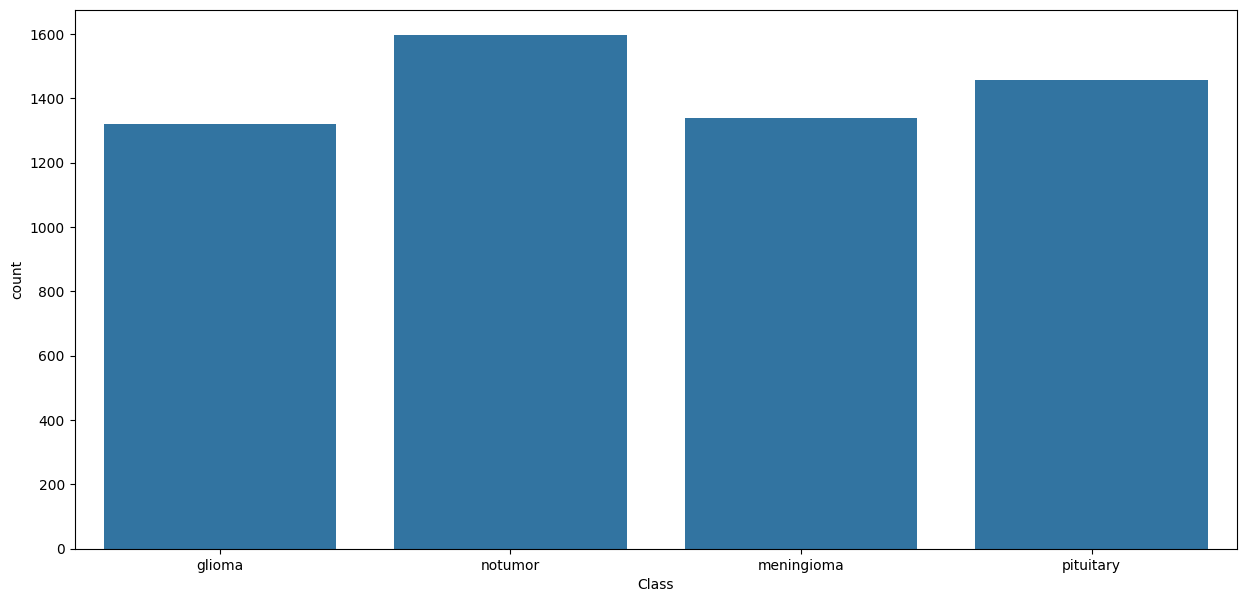

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

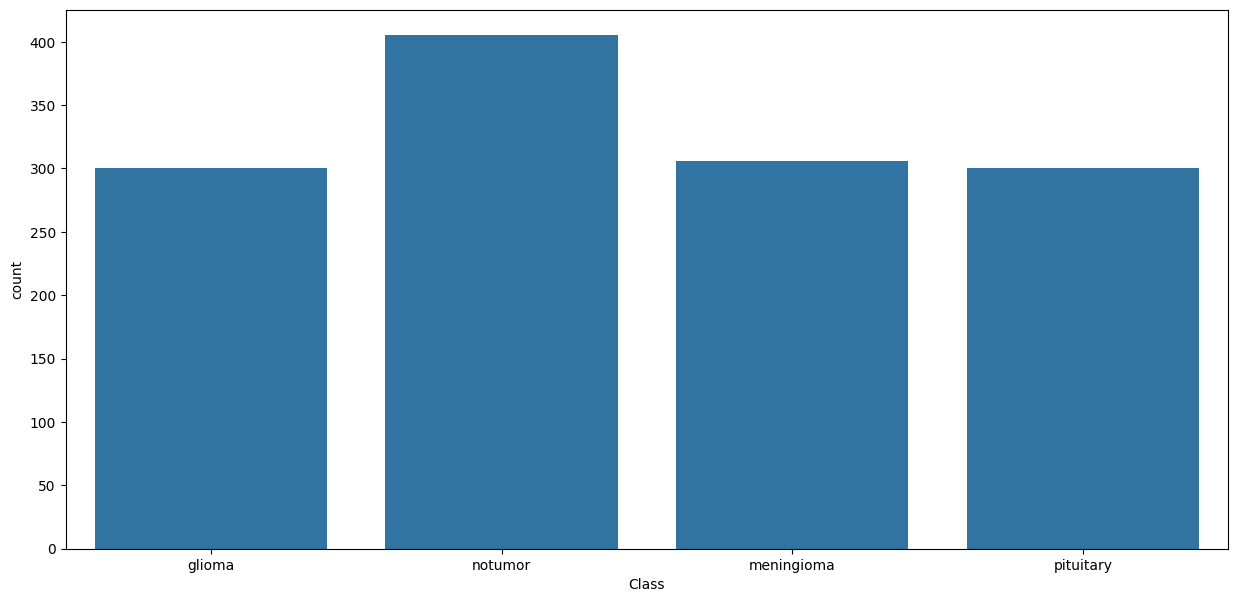

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Stratify keeps the proportion of classes the same in both dataframes
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
1277,/content/Testing/pituitary/Te-pi_0093.jpg,pituitary
302,/content/Testing/notumor/Te-no_0265.jpg,notumor
1008,/content/Testing/meningioma/Te-me_0059.jpg,meningioma
1221,/content/Testing/pituitary/Te-pi_0100.jpg,pituitary
36,/content/Testing/glioma/Te-gl_0028.jpg,glioma
...,...,...
884,/content/Testing/meningioma/Te-me_0126.jpg,meningioma
377,/content/Testing/notumor/Te-no_0239.jpg,notumor
563,/content/Testing/notumor/Te-no_0288.jpg,notumor
1176,/content/Testing/pituitary/Te-pi_0096.jpg,pituitary


In [13]:
ts_df

,Class Path,Class
407,/content/Testing/notumor/Te-no_0102.jpg,notumor
1005,/content/Testing/meningioma/Te-me_0036.jpg,meningioma
202,/content/Testing/glioma/Te-gl_0075.jpg,glioma
1209,/content/Testing/pituitary/Te-pi_0293.jpg,pituitary
1265,/content/Testing/pituitary/Te-pi_0225.jpg,pituitary
...,...,...
925,/content/Testing/meningioma/Te-me_0225.jpg,meningioma
96,/content/Testing/glioma/Te-gl_0111.jpg,glioma
275,/content/Testing/glioma/Te-gl_0044.jpg,glioma
1302,/content/Testing/pituitary/Te-piTr_0009.jpg,pituitary


In [14]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


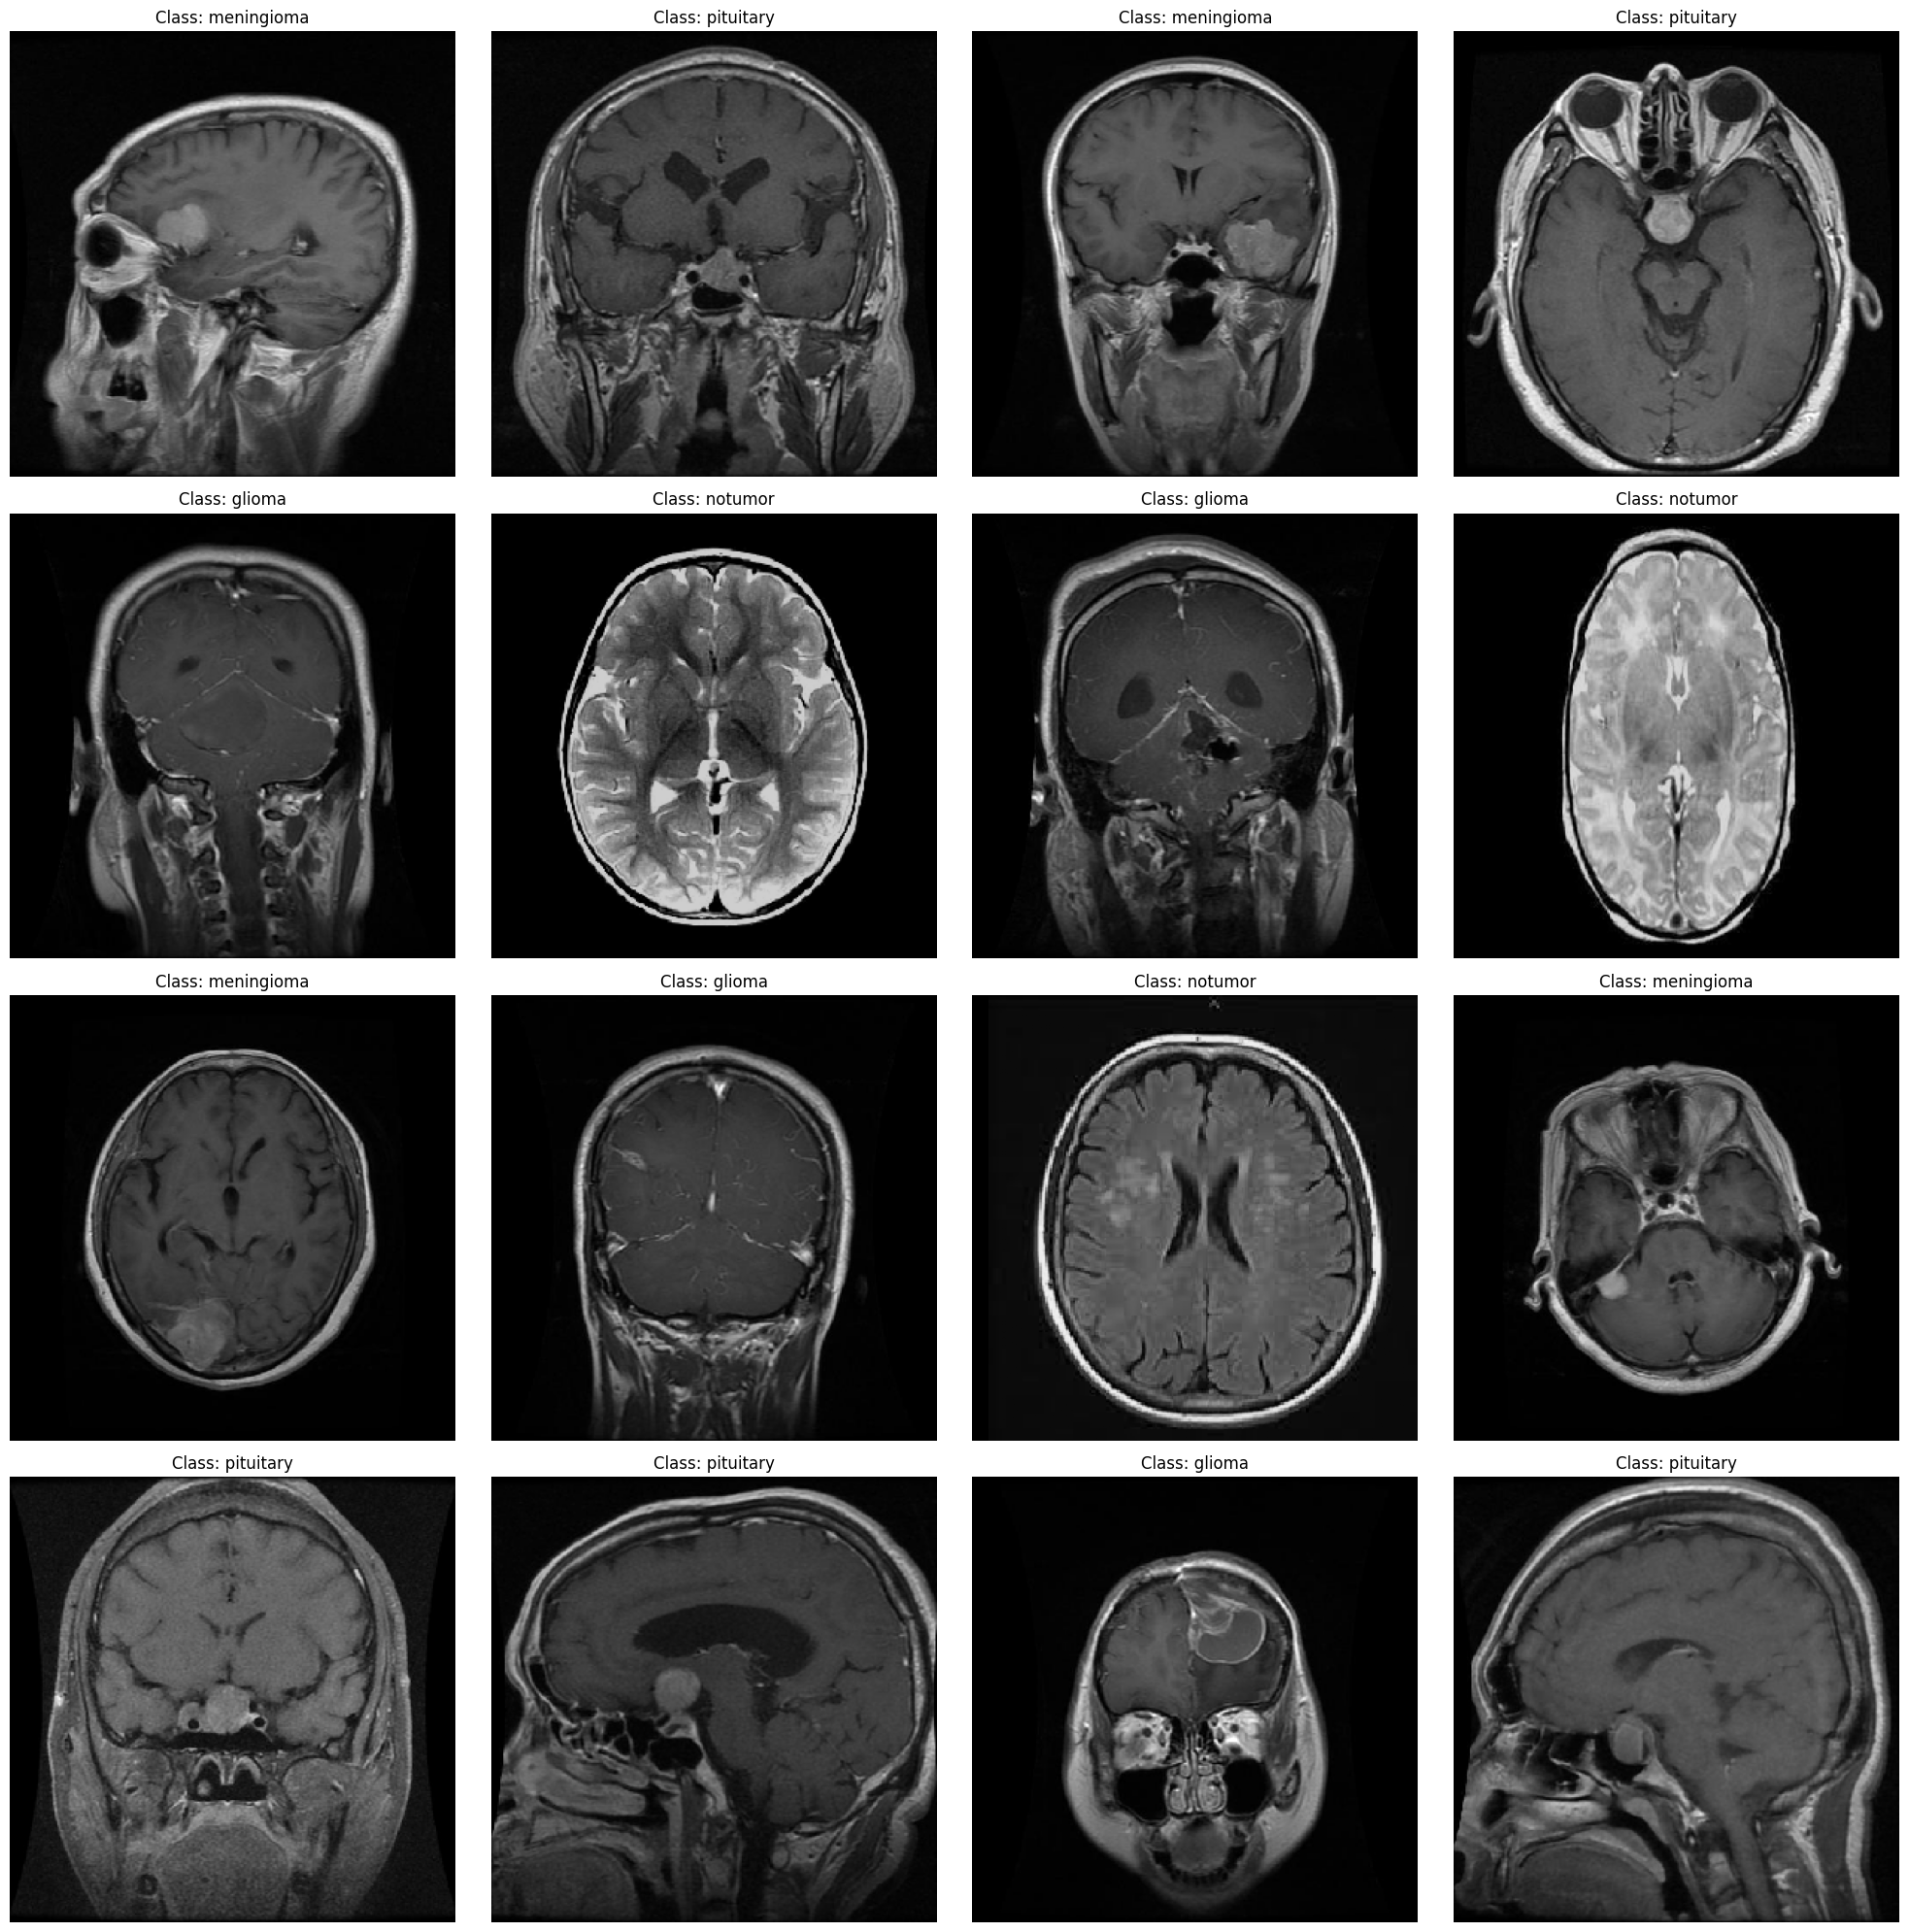

In [17]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
img_shape = (299,299, 3)

base_model = tf.keras.applications.Xception(include_top = False,
                                            weights = "imagenet",
                                            input_shape = img_shape,
                                            pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss = 'categorial_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])